# Men's World Record Mile Times

![a runner](https://www.nnrunningteam.com/files/images/485-458-1083-slide.jpg?1570881944)

## Goals for this example project:

1. Use documentation for some small challenges.

2. Practice data cleaning.

3. Practice aggregation. 

4. Practice simple visualization.

[source - wikipedia](https://en.wikipedia.org/wiki/Mile_run_world_record_progression#:~:text=World%20Athletics%20is%20the%20official,the%20IAAF%20for%20record%20purposes)

In [261]:
import datetime as dt
import json
import time
import matplotlib.pyplot as plt
import pandas as pd


In [262]:
data = pd.read_csv("https://raw.githubusercontent.com/josephplpriest/mens_WR_mile_run/master/mens_WR_mile_times.csv")


In [263]:
data.dtypes

Time           object
Auto           object
Athlete        object
Nationality    object
Date           object
Venue          object
dtype: object

In [264]:
data['Time'] = data['Time'].str.strip('*').astype(object)
data['Date'] = data['Date'].str.strip('[5]').astype(object)


In [265]:
del data['Auto']

In [266]:
print(data)

       Time             Athlete     Nationality              Date  \
0    4:14.4     John Paul Jones   United States       31 May 1913   
1    4:12.6        Norman Taber   United States       16 July 191   
2    4:10.4         Paavo Nurmi         Finland    23 August 1923   
3    4:09.2    Jules Ladoumègue          France    4 October 1931   
4    4:07.6       Jack Lovelock     New Zealand      15 July 1933   
5    4:06.8    Glenn Cunningham   United States      16 June 1934   
6    4:06.4    Sydney Wooderson  United Kingdom    28 August 1937   
7    4:06.2         Gunder Hägg          Sweden       1 July 1942   
8    4:06.2      Arne Andersson          Sweden      10 July 1942   
9    4:04.6         Gunder Hägg          Sweden  4 September 1942   
10   4:02.6      Arne Andersson          Sweden       1 July 1943   
11   4:01.6      Arne Andersson          Sweden      18 July 1944   
12   4:01.4         Gunder Hägg          Sweden       17 July 194   
13   3:59.4     Roger Bannister  U

In [267]:
for col in data:
    print(data[col].unique())

['4:14.4' '4:12.6' '4:10.4' '4:09.2' '4:07.6' '4:06.8' '4:06.4' '4:06.2'
 '4:04.6' '4:02.6' '4:01.6' '4:01.4' '3:59.4' '3:58.0' '3:57.2' '3:54.5'
 '3:54.4' '3:54.1' '3:53.6' '3:51.3' '3:51.1' '3:51.0' '3:49.4' '3:49.0'
 '3:48.8' '3:48.53' '3:48.40' '3:47.33' '3:46.32' '3:44.39' '3:43.13']
['John Paul Jones' 'Norman Taber' 'Paavo Nurmi' 'Jules Ladoumègue'
 'Jack Lovelock' 'Glenn Cunningham' 'Sydney Wooderson' 'Gunder Hägg'
 'Arne Andersson' 'Roger Bannister' 'John Landy' 'Derek Ibbotson'
 'Herb Elliott' 'Peter Snell' 'Michel Jazy' 'Jim Ryun' 'Filbert Bayi'
 'John Walker' 'Sebastian Coe' 'Steve Ovett' 'Steve Cram'
 'Noureddine Morceli' 'Hicham El Guerrouj']
['United States' 'Finland' 'France' 'New Zealand' 'United Kingdom'
 'Sweden' 'Australia' 'Tanzania' 'Algeria' 'Morocco']
['31 May 1913' '16 July 191' '23 August 1923' '4 October 1931'
 '15 July 1933' '16 June 1934' '28 August 1937' '1 July 1942'
 '10 July 1942' '4 September 1942' '1 July 1943' '18 July 1944'
 '17 July 194' '6 May 1954

In [268]:
data['Athlete'].value_counts()

Sebastian Coe         3
Gunder Hägg           3
Arne Andersson        3
Peter Snell           2
Steve Ovett           2
Jim Ryun              2
John Paul Jones       1
Noureddine Morceli    1
Steve Cram            1
John Walker           1
Filbert Bayi          1
Michel Jazy           1
Derek Ibbotson        1
Herb Elliott          1
Norman Taber          1
John Landy            1
Roger Bannister       1
Sydney Wooderson      1
Glenn Cunningham      1
Jack Lovelock         1
Jules Ladoumègue      1
Paavo Nurmi           1
Hicham El Guerrouj    1
Name: Athlete, dtype: int64

In [269]:
data['Time']=data['Time'].apply(lambda x: float(x.split(':')[0])*60+float(x.split(':')[1]))

In [280]:
data['Date'] = pd.to_datetime(data['Date'], errors="coerce")

In [282]:
data.dtypes

Time                  float64
Athlete                object
Nationality            object
Date           datetime64[ns]
Venue                  object
dtype: object

In [286]:
data.groupby(['Nationality']).agg(['nunique'])

,Time,Athlete,Date,Venue
,nunique,nunique,nunique,nunique
Nationality,,,,
Algeria,1,1,1,1
Australia,2,2,2,2
Finland,1,1,1,1
France,2,2,1,2
Morocco,1,1,1,1
New Zealand,4,3,3,4
Sweden,5,2,5,3
Tanzania,1,1,0,1


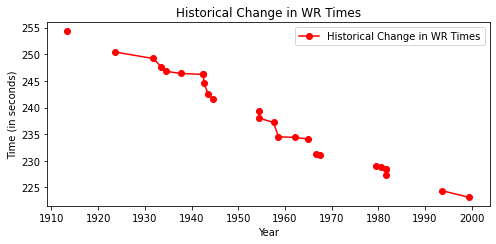

In [313]:
plt.plot(data['Date'], data['Time'], color='r', label='Historical Change in WR Times', marker='o')
plt.xlabel('Year')
plt.ylabel('Time (in seconds)')
plt.title('Historical Change in WR Times')
plt.legend()
plt.show()


## Tasks:

### [Easy: Data Cleaning](#easy)

[1.1](#1.1)
* Clean the asterisks from the time column?

*hint - look for pandas string methods to replace a character or characters*

[1.2](#1.2)
* Remove meaningless columns? 

*hint - do we have a column with lots of missing values, how to drop a column in pandas*

[1.3](#1.3)
* Clean the date column of "[5]"

*pandas string methods to replace characters*




### [Medium: Calculation and Aggregation](#medium)

[2.1](#2.1) 
* How many *unique* WR holders have there been? Who holds the most records?

*hint - pandas unique items in a column, value counts*


[2.2](#2.2) 
* Convert the time column into total seconds.

*hint - split a string, how to convert minutes to seconds and add*




### [Hard:](#hard)

[3.1](#3.1) 
* Convert the date column to the datetime type.

*hint - pandas datetime method*


[3.2](#3.2) 
* What country has the most DIFFERENT record holders?

*hint - pandas group by, unique*



## [Extra credit:](#ec)

[4.1](#4.1)
* Visualize a line plot of Date (on the x axis) and Time (on the y axis) to show the historical change in WR times.

*hint - pandas line plot*

#### 1.1 Cleaning the time column <a name="1.1"><a/>

In [270]:
# data['Time'] = data['Time'].str.strip('*').astype(object)

#### 1.2 Drop the "Auto" column <a name="1.2"><a/>

In [271]:
# del data['Auto']

#### 1.3 Clean the date column <a name="1.3"><a/>

In [272]:
# data['Date'] = data['Date'].str.strip('[5]').astype(object)


### Medium: <a name="medium"><a/>

#### 2.1 Looking at record holders (unique and multiple-record holders) <a name="2.1"><a/>

In [273]:
# for col in data:
    # print(data[col].unique())
    
    # 23 WORLD RECORD HOLDERS

In [274]:
# data['Athlete'].value_counts()

# It's a tie between Sebastian Coe, Gunder Hägg and Arne Andersson with 3 each

#### 2.2 Convert the "Time" column to seconds <a name="2.2"><a/>

In [275]:
# data['Time']=data['Time'].apply(lambda x: float(x.split(':')[0])*60+float(x.split(':')[1]))


### Hard: <a name="hard"><a/>

#### 3.1 Convert the "Date" column to datetime type<a name="3.1"><a/>

In [276]:
# data['Date'] = pd.to_datetime(data['Date'], errors="coerce")

#### 3.2 Rank countries by number (distinct) of record holders <a name="3.2"><a/>

In [277]:
# # data.groupby(['Nationality']).agg(['nunique'])
# United Kingdom??

### Extra Credit: <a name = "ec"><a/>

#### 4.1 Plot the dates vs times to see how the record has changed through history. <a name="4.1"><a/>

In [278]:
# plt.plot(data['Date'], data['Time'], color='r', label='Historical Change in WR Times', marker='o')
# plt.xlabel('Year')
# plt.ylabel('Time (in seconds)')
# plt.title('Historical Change in WR Times')
# plt.legend()
# plt.show()